# Статистический анализ данных поездок пользователей популярного сервиса аренды самокатов GoFast.

Автор - Кудинов Иван

## Описание проекта

Я аналитик популярного сервиса аренды самокатов GoFast. Мне передали данные о некоторых пользователях из нескольких городов, а также об их поездках. Необходимо проанализировать данные и проверить некоторые гипотезы, которые могут помочь бизнесу вырасти.

Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением. Сервисом можно пользоваться:
* без подписки
    * абонентская плата отсутствует;
    * стоимость одной минуты поездки — 8 рублей;
    * стоимость старта (начала поездки) — 50 рублей;
* с подпиской Ultra
    * абонентская плата — 199 рублей в месяц;
    * стоимость одной минуты поездки — 6 рублей;
    * стоимость старта — бесплатно.

## Описание данных

В основных данных есть информация о пользователях, их поездках и подписках.

Пользователи — [users_go.csv](https://code.s3.yandex.net/datasets/users_go.csv);
* user_id - уникальный идентификатор пользователя;
* name - имя пользователя;
* age - возраст;
* city - город;
* subscription_type - тип подписки (free, ultra).

Поездки — [rides_go.csv](https://code.s3.yandex.net/datasets/rides_go.csv);
* user_id - уникальный идентификатор пользователя;
* distance - расстояние, которое пользователь проехал в текущей сессии (в метрах);
* duration - продолжительность сессии (в минутах) — время с того момента, как пользователь нажал кнопку «Начать поездку» до момента, как он нажал кнопку «Завершить поездку»;
* date - дата совершения поездки.

Подписки — [subscriptions_go.csv](https://code.s3.yandex.net/datasets/subscriptions_go.csv);
* subscription_type - тип подписки;
* minute_price - стоимость одной минуты поездки по данной подписке;
* start_ride_price - стоимость начала поездки
* subscription_fee - стоимость ежемесячного платежа

## Инструкция по выполнению проекта

##### Шаг 1. Загрузка данных

1.1 Считаем CSV-файлы с данными с помощью библиотеки pandas и сохраним их в датафреймы. Пути к файлам:

    * /datasets/users_go.csv
    * /datasets/rides_go.csv
    * /datasets/subscriptions_go.csv

1.2 Выведим первые строки каждого набора данных. Изучим общую информацию о каждом датафрейме.

1.3 Промежуточные выводы.

##### Шаг 2. Предобработка данных

2.1 Приведем столбец date к типу даты pandas.

2.2 Создадим новый столбец с номером месяца на основе столбца date.

2.3 Проверим наличие пропущенных значений и дубликатов в датафреймах. Обработаем их, если такие значения присутствуют.

2.4 Проверка данных таблицы rides на аномалии

2.5 Промежуточные выводы.

##### Шаг 3. Исследовательский анализ данных

Опишим и визуализируем общую информацию о пользователях и поездках:

3.1 частота встречаемости городов;

3.2 соотношение пользователей с подпиской и без подписки;

3.3 возраст пользователей;

3.4 расстояние, которое пользователь преодолел за одну поездку;

3.5 продолжительность поездок.

3.6 Промежуточные выводы.

##### Шаг 4. Объединение данных

4.1 Объединим данные о пользователях, поездках и подписках в один датафрейм. Для этого воспользуйтемся методом merge().

4.2 Создадим ещё два датафрейма из датафрейма, созданного на этапе 4.1:

    * c данными о пользователях без подписки;
    * с данными о пользователях с подпиской.

4.3 Визуализируем информацию о расстоянии и времени поездок для пользователей обеих категорий.

4.4 Промежуточные выводы.

##### Шаг 5. Подсчёт выручки

5.1 Создадим датафрейм с агрегированными данными о поездках на основе датафрейма с объединёнными данными из шага 4: найдем суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц.

5.2 В этот же датафрейм добавим столбец с помесячной выручкой, которую принёс каждый пользователь. Для этого обратимся к информации об условиях оплаты для подписчиков и тех, у кого нет подписки. Продолжительность каждой поездки в каждой строке исходного датафрейма для подсчёта стоимости округлим до следующего целого числа: например, значения 25.3, 25.5 и 26.0 преобразуем в 26.

5.3 Промежуточные выводы.

##### Шаг 6. Проверка гипотез

Продакт-менеджеры сервиса хотят увеличить количество пользователей с подпиской. Для этого они будут проводить различные акции, но сначала нужно выяснить несколько важных моментов.

6.1 Важно понять, тратят ли пользователи с подпиской больше времени на поездки? Если да, то пользователи с подпиской могут быть «выгоднее» для компании. Проверим гипотезу. Используем исходные данные о продолжительности каждой сессии — отдельно для подписчиков и тех, у кого нет подписки.

6.2 Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров? Проверим гипотезу и сделаем выводы.

6.3 Проверим гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. Сделаем вывод.

6.4 Представим такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест нам понадобился бы для проверки этой гипотезы?

6.5 Промежуточные выводы.

##### Шаг 7. Распределения

7.1 Отделу маркетинга GoFast поставили задачу: нужно провести акцию с раздачей промокодов на один бесплатный месяц подписки, в рамках которой как минимум 100 существующих клиентов должны продлить эту подписку. То есть по завершении периода действия подписки пользователь может либо отказаться от неё, либо продлить, совершив соответствующий платёж. 

Эта акция уже проводилась ранее и по итогу выяснилось, что после бесплатного пробного периода подписку продлевают 10 % пользователей. Выясним, какое минимальное количество промокодов нужно разослать, чтобы вероятность не выполнить план была примерно 5 %. Подберем параметры распределения, описывающего эту ситуацию, построим график распределения и сформулируем ответ на вопрос о количестве промокодов.

7.2 Отдел маркетинга рассылает клиентам push-уведомления в мобильном приложении. Клиенты могут открыть его или не открывать. Известно, что уведомления открывают около 40 % получивших клиентов. Отдел планирует разослать 1 млн уведомлений. С помощью аппроксимации построим примерный график распределения и оценим вероятность того, что уведомление откроют не более 399,5 тыс. пользователей.

7.3 Промежуточные выводы.

##### Шаг 8. Общие выводы

Общие выводы по результатам проделанной работы.

## Шаг 1. Загрузка данных

#### 1.1 Считаем CSV-файлы с данными с помощью библиотеки pandas и сохраним их в датафреймы.

In [1]:
# Импортируем библиотеки для работы
import pandas as pd
from datetime import datetime, timedelta
from math import sqrt
from scipy import stats as st
import matplotlib.pyplot as plt
from scipy.stats import binom, norm
import seaborn as sns
import numpy as np

In [2]:
# Сразу преобразуем экспоненциальный формат представления чисел и избавимся от лишних знаков после запятых.
pd.set_option('display.float_format', '{:,.2f}'.format)

In [3]:
# Пользователи
try:
    users = pd.read_csv("D:/DA_42_Learning/Projects/S10_Statistical_data_analysis/users_go.csv")
except:
    users = pd.read_csv('https://code.s3.yandex.net/datasets/users_go.csv')

In [4]:
# Поездки
try:
    rides = pd.read_csv("D:/DA_42_Learning/Projects/S10_Statistical_data_analysis/rides_go.csv")
except:
    rides = pd.read_csv('https://code.s3.yandex.net/datasets/rides_go.csv')

In [5]:
# Подписки
try:
    subscriptions = pd.read_csv("D:/DA_42_Learning/Projects/S10_Statistical_data_analysis/subscriptions_go.csv")
except:
    subscriptions = pd.read_csv('https://code.s3.yandex.net/datasets/subscriptions_go.csv')

#### 1.2 Выведим первые строки каждого набора данных. Изучим общую информацию о каждом датафрейме.

In [6]:
users.head()

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


In [7]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


In [8]:
rides.head()

,user_id,distance,duration,date
0,1,"4,409.92",25.60,2021-01-01
1,1,"2,617.59",15.82,2021-01-18
2,1,754.16,6.23,2021-04-20
3,1,"2,694.78",18.51,2021-08-11
4,1,"4,028.69",26.27,2021-08-28


In [9]:
rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


In [10]:
subscriptions.head()

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


In [11]:
subscriptions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


#### 1.3 Промежуточные выводы.

* В полученных датафреймах наименование столбцов соответствует правилу красивого кода;
* В датафрейме rides выявил не соответствие по столбцу date типа данных с содержимым.

## Шаг 2. Предобработка данных

In [12]:
# Создаем копию датасетов до преобразования для контроля размера до и после обработки
temp_users = users.copy() 
len(temp_users)

1565

In [13]:
temp_rides = rides.copy() 
len(temp_rides)

18068

In [14]:
temp_subscriptions = subscriptions.copy() 
len(temp_subscriptions)

2

#### 2.1 Приведем столбец date к типу даты pandas.

In [15]:
# преобразуем тип данных и сразу проверим
rides['date'] = pd.to_datetime(rides['date'])
rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 564.8 KB


#### 2.2 Создадим новый столбец с номером месяца на основе столбца date.

In [16]:
# Проверим за какой период данные в датасете
rides['date']

0       2021-01-01
1       2021-01-18
2       2021-04-20
3       2021-08-11
4       2021-08-28
           ...    
18063   2021-11-04
18064   2021-11-16
18065   2021-11-18
18066   2021-11-27
18067   2021-12-29
Name: date, Length: 18068, dtype: datetime64[ns]

Данные в датасете за один год, создадим столбец по заданию.

In [17]:
# создайте новый столбец с номером месяца на основе столбца date.
rides['month'] = rides['date'].dt.month
rides.head()

,user_id,distance,duration,date,month
0,1,"4,409.92",25.60,2021-01-01,1
1,1,"2,617.59",15.82,2021-01-18,1
2,1,754.16,6.23,2021-04-20,4
3,1,"2,694.78",18.51,2021-08-11,8
4,1,"4,028.69",26.27,2021-08-28,8


#### 2.3 Проверим наличие пропущенных значений и дубликатов в датафреймах. Обработаем их, если такие значения присутствуют.

In [18]:
# Определяем в каких столбцах есть пропуски:
users.isna().sum().sort_values(ascending=False)

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

In [19]:
rides.isna().sum().sort_values(ascending=False)

user_id     0
distance    0
duration    0
date        0
month       0
dtype: int64

In [20]:
subscriptions.isna().sum().sort_values(ascending=False)

subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

Пропусков в данных нет.

In [21]:
# Проверим данные на явные дубликаты
users.duplicated().sum()

31

В таблице users есть явные дубликаты, они должны быть только по столбцу user_id, так как в остальных столбцах данные могут повторяться (имена, возраст). Проверим.

In [22]:
users['user_id'].duplicated().sum()

31

Все верно. Выведим их значения.

In [23]:
# сначала их номера
print(users['user_id'].value_counts().head(32))

209     2
807     2
611     2
43      2
737     2
47      2
1198    2
829     2
924     2
153     2
635     2
72      2
909     2
908     2
136     2
1045    2
1237    2
127     2
659     2
307     2
1245    2
121     2
666     2
108     2
297     2
809     2
293     2
16      2
422     2
403     2
204     2
1035    1
Name: user_id, dtype: int64


In [24]:
# И табличные данные
dupl_id = users["user_id"]

In [25]:
users[dupl_id.isin(dupl_id[dupl_id.duplicated()])].sort_values("user_id")

,user_id,name,age,city,subscription_type
15,16,Амалия,27,Краснодар,ultra
1535,16,Амалия,27,Краснодар,ultra
42,43,Стефания,22,Омск,ultra
1539,43,Стефания,22,Омск,ultra
1563,47,Юрий,28,Тюмень,ultra
...,...,...,...,...,...
1554,1198,Демид,29,Ростов-на-Дону,free
1558,1237,Евгения,23,Тюмень,free
1236,1237,Евгения,23,Тюмень,free
1544,1245,Регина,27,Пятигорск,free


Видим, что действительно все данные у повторяющихся user_id абсолютно идентично.
Удалим их.

In [26]:
users = users.drop_duplicates(subset=['user_id'], keep='first')

In [27]:
# И проверим еще раз данные на явные дубликаты
users.duplicated().sum()

0

In [28]:
# Проверим данные на явные дубликаты остальные датафреймы
rides.duplicated().sum()

0

In [29]:
subscriptions.duplicated().sum()

0

В таблицах rides и subscriptions явных дубликатов нет.

In [30]:
# Проверим на неявные дубликаты
users['user_id'].unique()

array([   1,    2,    3, ..., 1532, 1533, 1534])

In [31]:
print(users['user_id'].value_counts())

1       1
1020    1
1029    1
1028    1
1027    1
       ..
510     1
509     1
508     1
507     1
1534    1
Name: user_id, Length: 1534, dtype: int64


In [32]:
users['name'].unique()

array(['Кира', 'Станислав', 'Алексей', 'Константин', 'Адель', 'Регина',
       'Игорь', 'Юрий', 'Ян', 'Валерий', 'Агата', 'Марк', 'Ева',
       'Антонина', 'Валерия', 'Амалия', 'Даниил', 'Аделина', 'Святогор',
       'Борис', 'Вероника', 'Ростислав', 'Назар', 'Эдуард', 'Василий',
       'Денис', 'Тамара', 'Николай', 'Эвелина', 'Федор', 'Руслан', 'Иван',
       'Любовь', 'Ярослава', 'Майя', 'Ильдар', 'Данила', 'Нина',
       'Стефания', 'Ясмина', 'Дмитрий', 'Александр', 'Одиссей', 'Арсений',
       'Алла', 'Таисия', 'Максим', 'Юлиана', 'Павел', 'Карина', 'Алиса',
       'Лидия', 'Рамиль', 'Родион', 'Ника', 'Оксана', 'Анастасия',
       'Маргарита', 'Вера', 'Тимур', 'Никита', 'Лев', 'Влад', 'Артур',
       'Анна', 'Ольга', 'Вячеслав', 'Ксения', 'Виталина', 'Владислав',
       'Тамерлан', 'Амина', 'Вадим', 'Олеся', 'Зарина', 'Егор', 'Гордей',
       'Лилия', 'Святослав', 'Роберт', 'Амир', 'Влада', 'Богдан',
       'Полина', 'Марат', 'Елисей', 'Макар', 'Алина', 'Глеб', 'Андрей',
       'Ал

In [33]:
print(users['name'].value_counts())

Анна         22
Мария        22
Александр    17
Дмитрий      17
Никита       16
             ..
Мирослав      3
Семен         2
Радмир        1
Милана        1
Тихон         1
Name: name, Length: 194, dtype: int64


In [34]:
users['city'].unique()

array(['Тюмень', 'Омск', 'Москва', 'Ростов-на-Дону', 'Краснодар',
       'Пятигорск', 'Екатеринбург', 'Сочи'], dtype=object)

In [35]:
print(users['city'].value_counts())

Пятигорск         219
Екатеринбург      204
Ростов-на-Дону    198
Краснодар         193
Сочи              189
Омск              183
Тюмень            180
Москва            168
Name: city, dtype: int64


Проверил таблицу users на неявные дубликаты. Неявных дубликатов нет.
В таблицах rides и subscriptions содержатся соответственно данные о поездках и тарифе и их смысла проверять на неявные дубликаты нет.

Проверим датафрейм users после обработки

In [36]:
len(temp_users)

1565

In [37]:
len(users)

1534

Данные уменьшились на 31, т.е. на количество дубликатов. Контроль замера датафрейма пройден.

#### 2.4 Проверка данных таблицы rides на аномалии

In [38]:
# Проверим на уникальные значения расстояния поездок distance и отсортируем их по возрастанию
rides['distance'].sort_values(ascending=True).unique()

array([8.55682926e-01, 2.57078689e+00, 4.32950578e+00, ...,
       6.90849134e+03, 7.06600377e+03, 7.21100774e+03])

In [39]:
# Проверим количество повторений расстояний поездок distance
print(rides['distance'].value_counts())

741.55      1
4,158.23    1
3,672.12    1
4,533.00    1
2,437.27    1
           ..
2,949.53    1
3,289.89    1
3,047.55    1
2,931.72    1
4,031.94    1
Name: distance, Length: 18068, dtype: int64


In [40]:
# Подсчитаем количество уникальных значений расстояний поездок distance
rides['distance'].nunique()

18068

По столбцу расстояний поездок distance таблицы rides аномальных значений нет.

In [41]:
# Проверим на уникальные значения длительность поездок duration и отсортируем их по возрастанию
rides['duration'].sort_values(ascending=True).unique()

array([ 0.5       ,  2.03563247,  2.05325125, ..., 39.52660212,
       39.87385602, 40.82396262])

In [42]:
# Проверим количество повторений длительности поездок duration
print(rides['duration'].value_counts())

0.50     95
22.18     1
25.87     1
22.84     1
19.17     1
         ..
18.84     1
17.64     1
22.48     1
19.75     1
16.54     1
Name: duration, Length: 17974, dtype: int64


In [43]:
# Подсчитаем количество уникальных значений длительности поездок duration
rides['duration'].nunique()

17974

По столбцу длительности поездок duration таблицы rides наблюдаем интерсную особенность. 95 поездок длились с продолжительностью 0.5 мин. Проверим сколько же за это время проехали на самокате.

In [44]:
# Сделаем отбор по столбцу с продолжительностью поездок duration = 0.5 минут, 
# и отсортируем табличные данные по столбцу с расстоянием поездок distance
rides[rides['duration'] == 0.5].sort_values('distance', ascending=True)

,user_id,distance,duration,date,month
15132,1325,"4,030.31",0.50,2021-12-22,12
17909,1524,"4,104.00",0.50,2021-06-18,6
10692,1006,"4,106.28",0.50,2021-10-31,10
9698,937,"4,169.07",0.50,2021-12-12,12
14342,1268,"4,177.14",0.50,2021-06-09,6
...,...,...,...,...,...
14574,1285,"6,316.57",0.50,2021-09-25,9
13701,1224,"6,414.52",0.50,2021-07-15,7
11385,1057,"6,601.20",0.50,2021-02-07,2
17242,1477,"6,724.93",0.50,2021-01-12,1


Теперь можно смело заявлять, что 95 поездок с продолжительностью 0.5 мин являются аномальными значениями, т.к. за это время расстояние поездок distance находится в дипазоне от 4030 до 7211 метров, что не реально. 

Аномальные данные с дистаницей поездки можно было бы удалить, т.к. они составляют всего 0.5% от всего объема данных, но в них содержатся данные для расчета выручки компании, ведь пользователи в любом случае оплатили 1 минуту и возможно старт поездки, если они без подписки. В рамках данного анализа оставим их как есть.

In [45]:
len(temp_rides)

18068

In [46]:
len(rides)

18068

Данные не уменьшились. Контроль замера датафрейма пройден.

#### 2.5 Промежуточные выводы.

* данные в датасете rides представлены за один год;
* привел столбец date таблицы rides к типу даты datetime;
* создал в таблице rides новый столбец с номером месяца на основе столбца date;
* проверил наличие пропущенных значений и на явные и неявные дубликаты:
    * пропусков в данных нет;
    * в таблице users были явные дубликаты в столбце user_id. После проверки, удалил их;
    * в таблицах rides и subscriptions явных дубликатов нет;
    * проверил таблицу users на неявные дубликаты. Неявных дубликатов нет;
    * в таблице subscriptions содержатся данные о тарифе. Необходимости в их проверки на неявные дубликаты нет.
* проверил данные таблицы rides на аномалии:
    * по столбцу расстояний поездок distance таблицы rides аномальных значений нет;
    * по столбцу длительности поездок duration таблицы rides нашел 95 аномальных значений с продолжительностью поездки 0.5 мин и расстоянием за это время в дипазоне от 4030 до 7211 метров, что не реально;
    * аномальные данные с дистаницей поездки можно было бы удалить, т.к. они составляют всего 0.5% от всего объема данных, но в них содержатся данные для расчета выручки компании, ведь пользователи в любом случае оплатили 1 минуту и возможно старт поездки, если они без подписки. В рамках данного анализа оставим их как есть.

## Шаг 3. Исследовательский анализ данных

#### Опишим и визуализируем общую информацию о пользователях и поездках:

#### 3.1 Частота встречаемости городов

In [48]:
# Общие данные о столбце city
users['city'].describe()

count          1534
unique            8
top       Пятигорск
freq            219
Name: city, dtype: object

In [49]:
# создадим новый датафрейм для подсчета частоты городов и визуализации данных
data_city = users['city'].value_counts(ascending = False)
data_city

Пятигорск         219
Екатеринбург      204
Ростов-на-Дону    198
Краснодар         193
Сочи              189
Омск              183
Тюмень            180
Москва            168
Name: city, dtype: int64

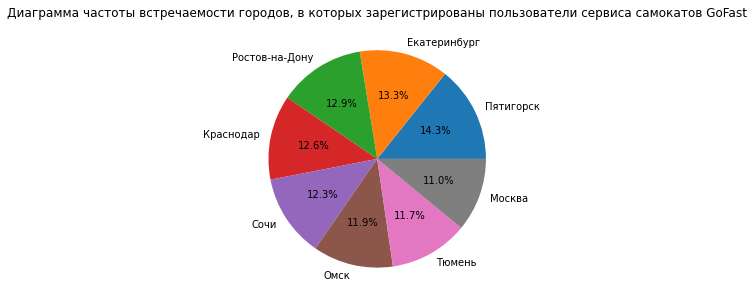

In [50]:
# Построим круговую диаграмму
data_city.plot(kind = 'pie', grid=True, figsize = (5,5), autopct='%1.1f%%')
plt.title('Диаграмма частоты встречаемости городов, в которых зарегистрированы пользователи сервиса самокатов GoFast')
plt.ylabel("");
plt.show()

Чаще всего встречаются пользователи из города Пятигорск 14.3% (219 пользователей). 2 место - Екатеринбург 13.3% (204 пользователей). 3 место - Ростов-на-Дону 12.9% (198 пользователей).

Обращает на себя внимание, что пользователей из Москвы меньше всех, - всего 11%, скорее всего это связано с высокой конкуренцией в данном городе.

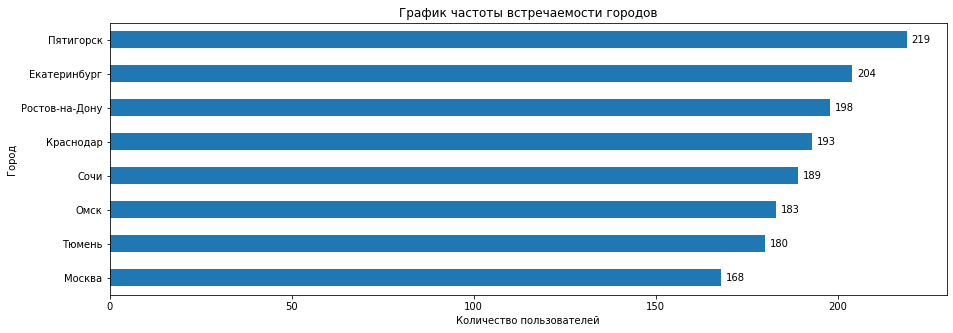

In [51]:
# Комментарий ревьюера
import matplotlib.pyplot as plt
import pandas as pd

# Создаем копию датасета, что бы не работать с исходным
tmp = users.copy()

# Построение горизонтальной диаграммы
ax = tmp['city'].value_counts(ascending=True).plot(
    kind='barh',
    figsize=(15, 5),
    title='График частоты встречаемости городов'
)

# Добавление значений рядом со столбцами
for p in ax.patches:
    width = p.get_width()
    ax.annotate(f'{width}',
                (width, p.get_y() + p.get_height() / 2.),
                ha='left', va='center',
                xytext=(5, 0),
                textcoords='offset points')

# Добавление меток осей
plt.xlabel('Количество пользователей')
plt.ylabel('Город')

# Отображение графика
plt.show()

#### 3.2 Cоотношение пользователей с подпиской и без подписки

In [52]:
# Общие данные о столбце subscription_type
users['subscription_type'].describe()

count     1534
unique       2
top       free
freq       835
Name: subscription_type, dtype: object

In [53]:
# создадим новый датафрейм для подсчета частоты пользователей с подпиской и без и для визуализации данных
data_subscription_type = users['subscription_type'].value_counts(ascending = False)
data_subscription_type

free     835
ultra    699
Name: subscription_type, dtype: int64

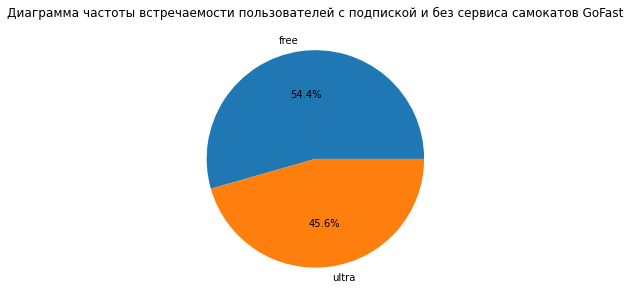

In [54]:
# Построим круговую диаграмму
data_subscription_type.plot(kind = 'pie', grid=True, figsize = (5,5), autopct='%1.1f%%')
plt.title('Диаграмма частоты встречаемости пользователей с подпиской и без сервиса самокатов GoFast')
plt.ylabel("");
plt.show()

Доля пользователей с подпиской ultra составляет 45.6%. 

#### 3.3 Возраст пользователей

In [55]:
# Общие данные о столбце age
users['age'].describe()

count   1,534.00
mean       24.90
std         4.57
min        12.00
25%        22.00
50%        25.00
75%        28.00
max        43.00
Name: age, dtype: float64

In [56]:
# создадим новый датафрейм для подсчета возраста пользователей 
data_age = users.groupby('age')['user_id'].count()
data_age = data_age.to_frame().reset_index()
data_age.rename(columns={'user_id':'users_amount'}, inplace=True)
data_age['age_ratio, %'] = (data_age['users_amount']/1534)*100
data_age['age_ratio, %'] = data_age['age_ratio, %'].round(2)
data_age_sorted = data_age.sort_values(by='age_ratio, %', ascending=False)
data_age_sorted

,age,users_amount,"age_ratio, %"
13,25,145,9.45
12,24,132,8.60
14,26,131,8.54
11,23,129,8.41
15,27,119,7.76
10,22,119,7.76
16,28,112,7.30
9,21,93,6.06
8,20,71,4.63
18,30,68,4.43


Для того что бы не было неравномерных пропусков на графике, т.е. что бы гистограмма равномерно отражала возраст пользователей подберем параметр bins равный количеству возрастов в датасете, т.е. как разницу максимального и минимального возраста (43-12) = 31

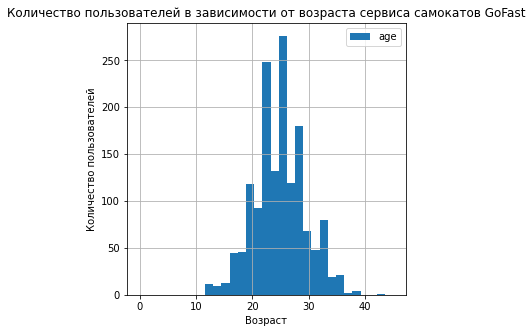

In [57]:
# Построим гистограмму для визуализации полученных данных
users.plot(y = 'age', kind = 'hist', bins = 31, grid=True, figsize = (5,5), range = (0,45))
plt.title('Количество пользователей в зависимости от возраста сервиса самокатов GoFast')
plt.xlabel('Возраст');
plt.ylabel("Количество пользователей");
plt.show()

Видим, что самыми активными являются пользователи в возрастной группе от 20 до 30 лет. И это логично.

* 1 место пользователи - 25 лет (9.45%, 145 пользователей);
* 2 место пользователи - 24 лет (8.60%, 132 пользователей);
* 3 место пользователи - 26 лет (8.54%, 131 пользователей).

Также хотелось бы отметить, что самокат арендуют пользователи с возрастом от 12 до 18 (не включительно) лет, что является нарушением законодательства.

Арендовать электросамокат могут только те, кто достиг 18 лет, т.к. ответственность за действия несовершеннолетних лежит на родителях или опекунах.

#### 3.4 Расстояние, которое пользователь преодолел за одну поездку

In [58]:
# Общие данные о столбце distance
rides['distance'].describe().round(0)

count   18,068.00
mean     3,071.00
std      1,117.00
min          1.00
25%      2,543.00
50%      3,134.00
75%      3,776.00
max      7,211.00
Name: distance, dtype: float64

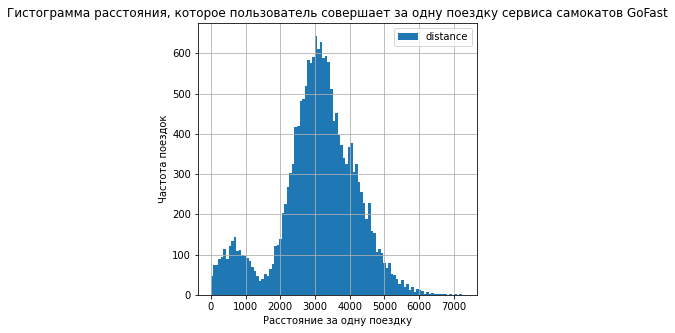

In [59]:
# Построим гистограмму для визуализации полученных данных
rides.plot(y = 'distance', kind = 'hist', bins = 100, grid=True, figsize = (5,5), range = (0,7300))
plt.title('Гистограмма расстояния, которое пользователь совершает за одну поездку сервиса самокатов GoFast')
plt.xlabel('Расстояние за одну поездку');
plt.ylabel("Частота поездок");
plt.show()

По гистограмме видим 2 пика, построим по ним уточненные гистограммы

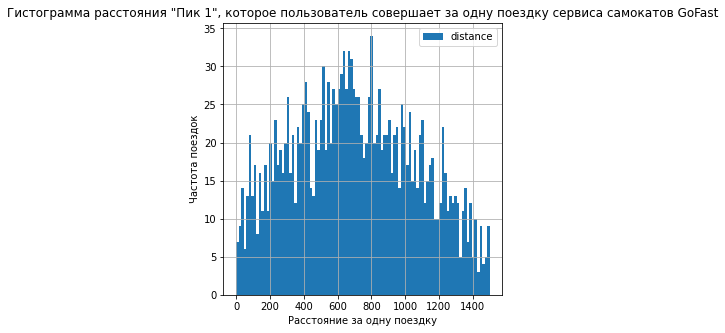

In [60]:
# Построим гистограмму для визуализации полученных данных
rides.plot(y = 'distance', kind = 'hist', bins = 100, grid=True, figsize = (5,5), range = (0,1500))
plt.title('Гистограмма расстояния "Пик 1", которое пользователь совершает за одну поездку сервиса самокатов GoFast')
plt.xlabel('Расстояние за одну поездку');
plt.ylabel("Частота поездок");
plt.show()

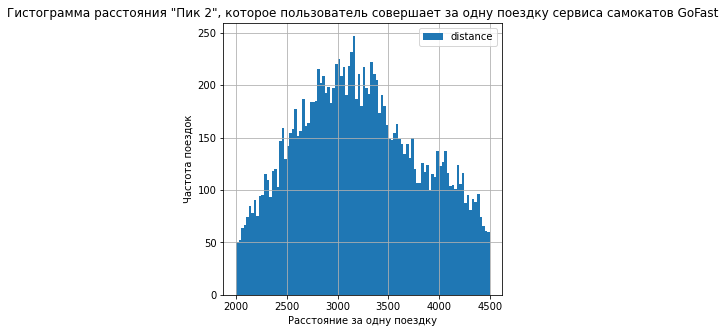

In [61]:
# Построим гистограмму для визуализации полученных данных
rides.plot(y = 'distance', kind = 'hist', bins = 100, grid=True, figsize = (5,5), range = (2000,4500))
plt.title('Гистограмма расстояния "Пик 2", которое пользователь совершает за одну поездку сервиса самокатов GoFast')
plt.xlabel('Расстояние за одну поездку');
plt.ylabel("Частота поездок");
plt.show()

Чаще всего пользователи проезжают за одну поездку от 2800 до 3300 метров, самый пик 3000 метров (это самый выскойи 1 пик). Второй пик - это расстояние около 650 метров. Чем дальше от этих пиков, тем количество поездок становится меньше.

Интересное наблюдение, что между 2-мя пиками при расстоянии 1500 метров, количество поездок максимадьно снижается.

Можно сделать вывод, что пользователи берут самокаты либо для коротких перемещений по необходимости (например, от дома до остановки), либо для долгих прогулок или перемещений.

#### 3.5 Продолжительность поездок

In [62]:
# Общие данные о столбце duration
rides['duration'].describe().round(0)

count   18,068.00
mean        18.00
std          6.00
min          0.00
25%         14.00
50%         18.00
75%         22.00
max         41.00
Name: duration, dtype: float64

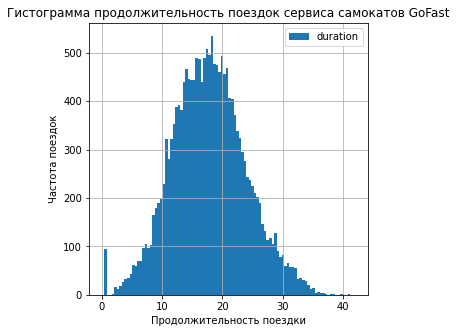

In [63]:
# Построим гистограмму для визуализации полученных данных
rides.plot(y = 'duration', kind = 'hist', bins = 100, grid=True, figsize = (5,5), range = (0,42))
plt.title('Гистограмма продолжительность поездок сервиса самокатов GoFast')
plt.xlabel('Продолжительность поездки');
plt.ylabel("Частота поездок");
plt.show()

Чаще всего пользователи ездят на самокатах от 15 до 21 минуты. Есть тот самый аномальный пик около нуля с временем поездки 0.5 минут, возможно часть пользователей не разобрались как пользоваться либо самокатом, либо приложением и отменили поездку. А вот с замером расстояния поездки стоит проанализирвоать работу приложения.

#### 3.6 Промежуточные выводы.

* Чаще всего встречаются пользователи из города Пятигорск 14.3% (219 пользователей). 2 место - Екатеринбург 13.3% (204 пользователей). 3 место - Ростов-на-Дону 12.9% (198 пользователей). Обращает на себя внимание, что пользователей из Москвы меньше всех, - всего 11%, скорее всего это связано с высокой конкуренцией в данном городе;
* Доля пользователей с подпиской ultra составляет 45.6%.
* Самыми активными являются пользователи в возрастной группе от 20 до 30 лет, а именно:
    * 1 место пользователи - 25 лет (9.45%, 145 пользователей);
    * 2 место пользователи - 24 лет (8.60%, 132 пользователей);
    * 3 место пользователи - 26 лет (8.54%, 131 пользователей).
* Также хотелось бы отметить, что самокат арендуют пользователи с возрастом от 12 до 18 (не включительно) лет, что является нарушением законодательства. Арендовать электросамокат могут только те, кто достиг 18 лет, т.к. ответственность за действия несовершеннолетних лежит на родителях или опекунах.
* Чаще всего пользователи проезжают за одну поездку от 2800 до 3300 метров, самый пик 3000 метров (это самый выскоий 1-ый пик). Второй пик - это расстояние около 650 метров. Чем дальше от этих пиков, тем количество поездок становится меньше. Интересное наблюдение, что между 2-мя пиками при расстоянии около 1500 метров, количество поездок максимально снижается. Можно сделать вывод, что пользователи берут самокаты либо для коротких перемещений по необходимости (например, от дома до остановки), либо для долгих прогулок.
* Чаще всего пользователи ездят на самокатах от 15 до 21 минуты. Есть тот самый аномальный пик около нуля с временем поездки 0.5 минут, возможно часть пользователей не разобрались как пользоваться либо самокатом, либо приложением и отменили поездку. А вот с замером расстояния поездки стоит проанализирвоать работу приложения.

## Шаг 4. Объединение данных

#### 4.1 Объединим данные о пользователях, поездках и подписках в один датафрейм. Для этого воспользуйтемся методом merge().

In [64]:
data_1 = rides.merge(users, on='user_id')
data_1

,user_id,distance,duration,date,month,name,age,city,subscription_type
0,1,"4,409.92",25.60,2021-01-01,1,Кира,22,Тюмень,ultra
1,1,"2,617.59",15.82,2021-01-18,1,Кира,22,Тюмень,ultra
2,1,754.16,6.23,2021-04-20,4,Кира,22,Тюмень,ultra
3,1,"2,694.78",18.51,2021-08-11,8,Кира,22,Тюмень,ultra
4,1,"4,028.69",26.27,2021-08-28,8,Кира,22,Тюмень,ultra
...,...,...,...,...,...,...,...,...,...
18063,1534,"3,781.10",19.82,2021-11-04,11,Альберт,25,Краснодар,free
18064,1534,"2,840.42",21.41,2021-11-16,11,Альберт,25,Краснодар,free
18065,1534,"3,826.19",18.44,2021-11-18,11,Альберт,25,Краснодар,free
18066,1534,"2,902.31",16.67,2021-11-27,11,Альберт,25,Краснодар,free


In [65]:
data_total = data_1.merge(subscriptions, on='subscription_type')
data_total

,user_id,distance,duration,date,month,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
0,1,"4,409.92",25.60,2021-01-01,1,Кира,22,Тюмень,ultra,6,0,199
1,1,"2,617.59",15.82,2021-01-18,1,Кира,22,Тюмень,ultra,6,0,199
2,1,754.16,6.23,2021-04-20,4,Кира,22,Тюмень,ultra,6,0,199
3,1,"2,694.78",18.51,2021-08-11,8,Кира,22,Тюмень,ultra,6,0,199
4,1,"4,028.69",26.27,2021-08-28,8,Кира,22,Тюмень,ultra,6,0,199
...,...,...,...,...,...,...,...,...,...,...,...,...
18063,1534,"3,781.10",19.82,2021-11-04,11,Альберт,25,Краснодар,free,8,50,0
18064,1534,"2,840.42",21.41,2021-11-16,11,Альберт,25,Краснодар,free,8,50,0
18065,1534,"3,826.19",18.44,2021-11-18,11,Альберт,25,Краснодар,free,8,50,0
18066,1534,"2,902.31",16.67,2021-11-27,11,Альберт,25,Краснодар,free,8,50,0


In [66]:
# Проверим на пропуски объединенный датасет:
data_total.isna().sum().sort_values(ascending=False)

user_id              0
distance             0
duration             0
date                 0
month                0
name                 0
age                  0
city                 0
subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

В объединенном датасете пропусков нет.

#### 4.2 Создадим ещё два датафрейма из датафрейма, созданного на этапе 4.1:

* c данными о пользователях без подписки;
* с данными о пользователях с подпиской.

In [67]:
# датафрейм с данными о пользователях с подпиской
data_total_ultra = data_total[data_total['subscription_type'].isin(['ultra'])]
data_total_ultra

,user_id,distance,duration,date,month,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
0,1,"4,409.92",25.60,2021-01-01,1,Кира,22,Тюмень,ultra,6,0,199
1,1,"2,617.59",15.82,2021-01-18,1,Кира,22,Тюмень,ultra,6,0,199
2,1,754.16,6.23,2021-04-20,4,Кира,22,Тюмень,ultra,6,0,199
3,1,"2,694.78",18.51,2021-08-11,8,Кира,22,Тюмень,ultra,6,0,199
4,1,"4,028.69",26.27,2021-08-28,8,Кира,22,Тюмень,ultra,6,0,199
...,...,...,...,...,...,...,...,...,...,...,...,...
6495,699,"3,973.05",24.67,2021-08-29,8,Оксана,22,Москва,ultra,6,0,199
6496,699,"3,288.70",15.89,2021-09-12,9,Оксана,22,Москва,ultra,6,0,199
6497,699,"3,076.16",14.39,2021-09-26,9,Оксана,22,Москва,ultra,6,0,199
6498,699,"4,707.85",15.84,2021-10-17,10,Оксана,22,Москва,ultra,6,0,199


In [68]:
# датафрейм с данными о пользователях без подписки
data_total_free = data_total[data_total['subscription_type'].isin(['free'])]
data_total_free

,user_id,distance,duration,date,month,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
6500,700,"2,515.69",14.94,2021-01-02,1,Айдар,22,Омск,free,8,50,0
6501,700,846.93,16.23,2021-02-01,2,Айдар,22,Омск,free,8,50,0
6502,700,"4,004.43",20.02,2021-02-04,2,Айдар,22,Омск,free,8,50,0
6503,700,"1,205.91",9.78,2021-02-10,2,Айдар,22,Омск,free,8,50,0
6504,700,"3,047.38",17.43,2021-02-14,2,Айдар,22,Омск,free,8,50,0
...,...,...,...,...,...,...,...,...,...,...,...,...
18063,1534,"3,781.10",19.82,2021-11-04,11,Альберт,25,Краснодар,free,8,50,0
18064,1534,"2,840.42",21.41,2021-11-16,11,Альберт,25,Краснодар,free,8,50,0
18065,1534,"3,826.19",18.44,2021-11-18,11,Альберт,25,Краснодар,free,8,50,0
18066,1534,"2,902.31",16.67,2021-11-27,11,Альберт,25,Краснодар,free,8,50,0


#### 4.3 Визуализируем информацию о расстоянии и времени поездок для пользователей обеих категорий.

##### Пользователи с подпиской ultra

In [69]:
# Общие данные о столбце distance
data_total_ultra['distance'].describe().round(0)

count   6,500.00
mean    3,115.00
std       837.00
min       244.00
25%     2,785.00
50%     3,149.00
75%     3,561.00
max     5,700.00
Name: distance, dtype: float64

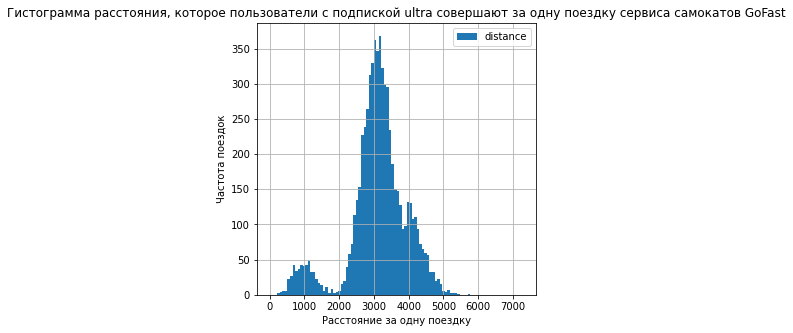

In [70]:
# Построим гистограмму для визуализации полученных данных
data_total_ultra.plot(y = 'distance', kind = 'hist', bins = 100, grid=True, figsize = (5,5), range = (0,7300))
plt.title('Гистограмма расстояния, которое пользователи с подпиской ultra совершают за одну поездку сервиса самокатов GoFast')
plt.xlabel('Расстояние за одну поездку');
plt.ylabel("Частота поездок");
plt.show()

Наблюдаем также 2 пика. Чаще всего пользователи проезжают за одну поездку от 2900 до 3200 метров, самый пик 3100 метров (это самый высокий 1-ый пик). Второй пик - это расстояние около 1000 метров. Чем дальше от этих пиков, тем количество поездок становится меньше.

Такое же интересное наблюдение, что между 2-мя пиками при расстоянии 2000 метров, количество поездок максимадльно снижается.

In [71]:
# Общие данные о столбце duration
data_total_ultra['duration'].describe().round(0)

count   6,500.00
mean       19.00
std         6.00
min         4.00
25%        15.00
50%        18.00
75%        22.00
max        41.00
Name: duration, dtype: float64

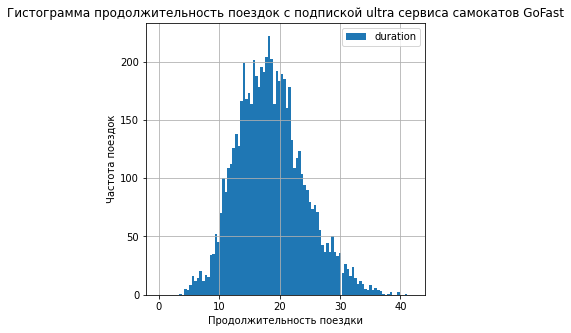

In [72]:
# Построим гистограмму для визуализации полученных данных
data_total_ultra.plot(y = 'duration', kind = 'hist', bins = 100, grid=True, figsize = (5,5), range = (0,42))
plt.title('Гистограмма продолжительность поездок с подпиской ultra сервиса самокатов GoFast')
plt.xlabel('Продолжительность поездки');
plt.ylabel("Частота поездок");
plt.show()

Чаще всего пользователи с подпиской ultra ездят на самокатах от 15 до 21 минуты.

##### Пользователи без подписки free

In [73]:
# Общие данные о столбце distance
data_total_free['distance'].describe().round(0)

count   11,568.00
mean     3,045.00
std      1,246.00
min          1.00
25%      2,367.00
50%      3,115.00
75%      3,906.00
max      7,211.00
Name: distance, dtype: float64

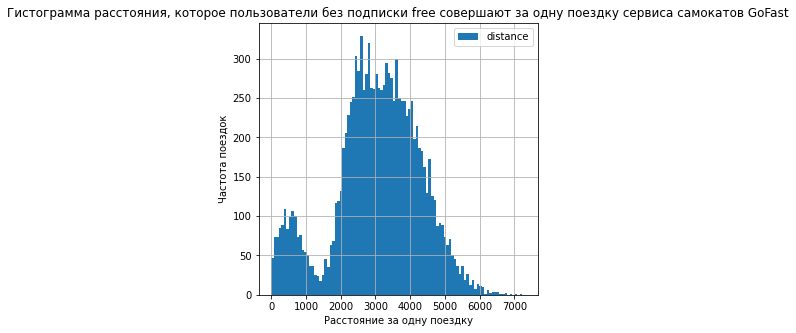

In [74]:
# Построим гистограмму для визуализации полученных данных
data_total_free.plot(y = 'distance', kind = 'hist', bins = 100, grid=True, figsize = (5,5), range = (0,7300))
plt.title('Гистограмма расстояния, которое пользователи без подписки free совершают за одну поездку сервиса самокатов GoFast')
plt.xlabel('Расстояние за одну поездку');
plt.ylabel("Частота поездок");
plt.show()

Наблюдаем также 2 пика. Чаще всего пользователи без подписки free  проезжают за одну поездку от 2200 до 3800 метров, это самый высокий 1-ый пик, но он очень широкий по разбросу расстояний. Второй пик также досточно широкий и начинается с нуля, возможно, часть пользователей не разобрались как пользоваться либо самокатом, либо приложением и отменили поездку.

Такое же интересное наблюдение, что между 2-мя пиками при расстоянии около 1500 метров, количество поездок максимадльно снижается.

In [75]:
# Общие данные о столбце duration
data_total_free['duration'].describe().round(0)

count   11,568.00
mean        17.00
std          6.00
min          0.00
25%         13.00
50%         17.00
75%         22.00
max         35.00
Name: duration, dtype: float64

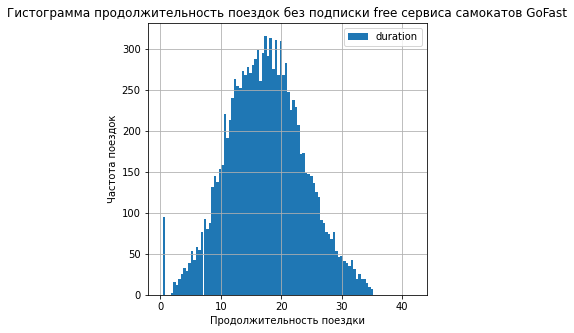

In [76]:
# Построим гистограмму для визуализации полученных данных
data_total_free.plot(y = 'duration', kind = 'hist', bins = 100, grid=True, figsize = (5,5), range = (0,42))
plt.title('Гистограмма продолжительность поездок без подписки free сервиса самокатов GoFast')
plt.xlabel('Продолжительность поездки');
plt.ylabel("Частота поездок");
plt.show()

Чаще всего пользователи ездят на самокатах от 13 до 21 минуты. Есть интересный пик около нуля, возможно часть пользователей не разобрались как пользоваться либо самокатом, либо приложением и отменили поездку.

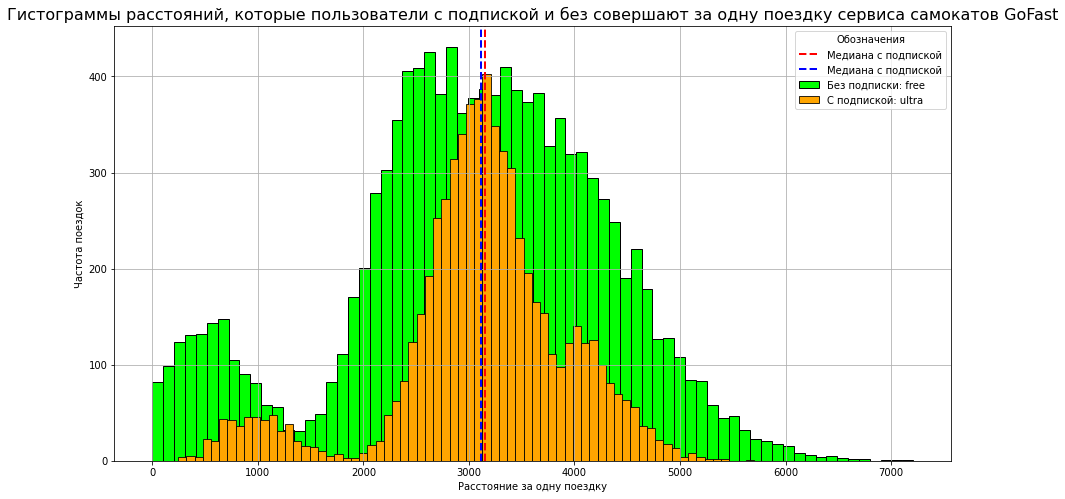

In [77]:
# Построим объединенные гистограммы расстояний поездок для пользователей с подпиской и без

plt.figure(figsize=(15, 8))

# Гистограмма для пользователей без подписки free
sns.histplot(data_total_free['distance'], bins=70, color='lime', alpha=1, label='Без подписки: free')

# Гистограмма для пользователей с подпиской ultra
sns.histplot(data_total_ultra['distance'], bins=70, color='orange', alpha=1, label='С подпиской: ultra')

# Добавляем медианы 
median_distance_ultra = np.median(data_total_ultra['distance'])
median_distance_free = np.median(data_total_free['distance'])
plt.axvline(median_distance_ultra, color='red', linestyle='dashed', linewidth=2, label='Медиана c подпиской')
plt.axvline(median_distance_free, color='blue', linestyle='dashed', linewidth=2, label='Медиана c подпиской')

# Добавляем легенду
plt.legend(title='Обозначения',loc='best')

# # Добавляем заголовок и отображение графика
plt.title('Гистограммы расстояний, которые пользователи с подпиской и без совершают за одну поездку сервиса самокатов GoFast'
          , fontsize=16)
plt.xlabel('Расстояние за одну поездку')
plt.ylabel('Частота поездок')
plt.grid(True)
plt.show()

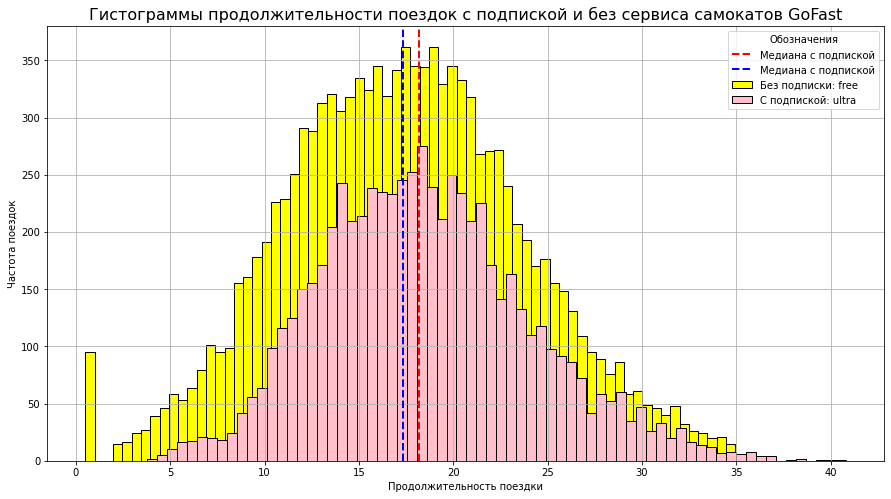

In [78]:
# Построим объединенные гистограммы расстояний поездок для пользователей с подпиской и без

plt.figure(figsize=(15, 8))

# Гистограмма для пользователей без подписки free
sns.histplot(data_total_free['duration'], bins=70, color='Yellow', alpha=1, label='Без подписки: free')

# Гистограмма для пользователей с подпиской ultra
sns.histplot(data_total_ultra['duration'], bins=70, color='Pink', alpha=1, label='С подпиской: ultra')

# Добавляем медианы 
median_duration_ultra = np.median(data_total_ultra['duration'])
median_duration_free = np.median(data_total_free['duration'])
plt.axvline(median_duration_ultra, color='red', linestyle='dashed', linewidth=2, label='Медиана c подпиской')
plt.axvline(median_duration_free, color='blue', linestyle='dashed', linewidth=2, label='Медиана c подпиской')

# Добавляем легенду
plt.legend(title='Обозначения', loc='best')

# # Добавляем заголовок и отображение графика
plt.title('Гистограммы продолжительности поездок с подпиской и без сервиса самокатов GoFast'
          , fontsize=16)
plt.xlabel('Продолжительность поездки');
plt.ylabel("Частота поездок");
plt.grid(True)
plt.show()

#### 4.4 Промежуточные выводы.

* Объединил данные о пользователях, поездках и подписках в один датафрейм методом merge(). Проверил объединенный датасет на пропуски, - пропусков нет;
* Создал ещё два датафрейма c данными о пользователях без подписки free и с данными о пользователях с подпиской ultra;
* Пользователи с подпиской ultra: 
    * Пользователи с подпиской ultra ездят с четким пониманием своих потребностей в самокате и как раз гистограммы длительности и расстояния потребностей посторились достаточно узкие;
    * Наблюдаем 2 пика на гистограмме расстояний одной поездки. Чаще всего пользователи проезжают за одну поездку от 2900 до 3200 метров, самый пик 3100 метров (это самый высокий 1-ый пик). Второй пик - это расстояние около 1000 метров. Чем дальше от этих пиков, тем количество поездок становится меньше. Такое же интересное наблюдение, что между 2-мя пиками при расстоянии 2000 метров, количество поездок максимадльно снижается;
    * Чаще всего пользователи с подпиской ultra ездят на самокатах от 15 до 21 минуты.
* Пользователи без подписки free:
    * Пользователи без подписки free ездят в более широком диапазоне расстояний и времени поездки. И наблюдаются пики около нуля, возможно есть необходимость либо доработать приложение, либо инструкцию пользования самокатом, т.к. пользователи по итогу не совершили поездку;
    * Наблюдаем также 2 пика на гистограмме расстояний одной поездки. Чаще всего пользователи без подписки free  проезжают за одну поездку от 2200 до 3800 метров, это самый высокий 1-ый пик, но он очень широкий по разбросу расстояний. Второй пик также досточно широкий и начинается с нуля, возможно, часть пользователей не разобрались как пользоваться либо самокатом, либо приложением и отменили поездку. Такое же интересное наблюдение, что между 2-мя пиками при расстоянии около 1500 метров, количество поездок максимадльно снижается.
    * Чаще всего пользователи ездят на самокатах от 13 до 21 минуты. Есть интересный пик около нуля, возможно часть пользователей не разобрались как пользоваться либо самокатом, либо приложением и отменили поездку.


## Шаг 5. Подсчёт выручки

#### 5.1 Создадим датафрейм с агрегированными данными о поездках на основе датафрейма с объединёнными данными из шага 4: найдем суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц.

In [79]:
# Продолжительность каждой поездки округляем с помощью метода «потолок» библиотеки numpy — np.ceil():
# Дистанцию поездки с помощь round
data_total['duration'] = np.ceil(data_total['duration'])
data_total['distance'] = data_total['distance'].round(0)
data_total.head()

,user_id,distance,duration,date,month,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
0,1,"4,410.00",26.00,2021-01-01,1,Кира,22,Тюмень,ultra,6,0,199
1,1,"2,618.00",16.00,2021-01-18,1,Кира,22,Тюмень,ultra,6,0,199
2,1,754.00,7.00,2021-04-20,4,Кира,22,Тюмень,ultra,6,0,199
3,1,"2,695.00",19.00,2021-08-11,8,Кира,22,Тюмень,ultra,6,0,199
4,1,"4,029.00",27.00,2021-08-28,8,Кира,22,Тюмень,ultra,6,0,199


In [80]:
# Создадим датафрейм
data_grouped = data_total.groupby(
    ['user_id', 'name', 'age', 'city', 'month', 'subscription_type', 'minute_price', 'start_ride_price', 'subscription_fee']
    ).agg({'distance':'sum', 'duration':'sum', 'date':'count'
}).reset_index()
data_grouped.rename(columns={
    'distance': 'total_distance',
    'duration': 'total_duration',
    'date':'count_trips'}, inplace=True)
data_grouped

,user_id,name,age,city,month,subscription_type,minute_price,start_ride_price,subscription_fee,total_distance,total_duration,count_trips
0,1,Кира,22,Тюмень,1,ultra,6,0,199,"7,028.00",42.00,2
1,1,Кира,22,Тюмень,4,ultra,6,0,199,754.00,7.00,1
2,1,Кира,22,Тюмень,8,ultra,6,0,199,"6,724.00",46.00,2
3,1,Кира,22,Тюмень,10,ultra,6,0,199,"5,810.00",32.00,2
4,1,Кира,22,Тюмень,11,ultra,6,0,199,"7,004.00",56.00,3
...,...,...,...,...,...,...,...,...,...,...,...,...
11326,1534,Альберт,25,Краснодар,6,free,8,50,0,"3,409.00",26.00,2
11327,1534,Альберт,25,Краснодар,8,free,8,50,0,"7,623.00",48.00,2
11328,1534,Альберт,25,Краснодар,9,free,8,50,0,"4,928.00",23.00,1
11329,1534,Альберт,25,Краснодар,11,free,8,50,0,"13,349.00",78.00,4


In [81]:
# Проверим на пропуски новый датасет:
data_grouped.isna().sum().sort_values(ascending=False)

user_id              0
name                 0
age                  0
city                 0
month                0
subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
total_distance       0
total_duration       0
count_trips          0
dtype: int64

Пропусков нет.

#### 5.2 В этот же датафрейм добавим столбец с помесячной выручкой, которую принёс каждый пользователь. Для этого обратимся к информации об условиях оплаты для подписчиков и тех, у кого нет подписки. Продолжительность каждой поездки в каждой строке исходного датафрейма для подсчёта стоимости округлим до следующего целого числа: например, значения 25.3, 25.5 и 26.0 преобразуем в 26.

In [82]:
# Продолжительность каждой поездки и дистанцию округляем с помощью метода «потолок» библиотеки numpy — np.ceil():
# data_grouped['duration'] = np.ceil(data_grouped['duration'])
# data_grouped['distance'] = np.ceil(data_grouped['distance'])
# data_grouped.head()

In [83]:
# Для заполнения данных о выручке, напишем функцию:
def revenue (row):
    total_duration = row['total_duration']
    subscription_type = row['subscription_type']
    count_trips = row['count_trips']
    if subscription_type == 'ultra':
        return (total_duration * row['minute_price'] + row['subscription_fee'])
    elif subscription_type == 'free':
        return (total_duration * row['minute_price'] + count_trips * row['start_ride_price'])

In [84]:
data_grouped['revenue'] = data_grouped.apply(revenue, axis = 1)
data_grouped

,user_id,name,age,city,month,subscription_type,minute_price,start_ride_price,subscription_fee,total_distance,total_duration,count_trips,revenue
0,1,Кира,22,Тюмень,1,ultra,6,0,199,"7,028.00",42.00,2,451.00
1,1,Кира,22,Тюмень,4,ultra,6,0,199,754.00,7.00,1,241.00
2,1,Кира,22,Тюмень,8,ultra,6,0,199,"6,724.00",46.00,2,475.00
3,1,Кира,22,Тюмень,10,ultra,6,0,199,"5,810.00",32.00,2,391.00
4,1,Кира,22,Тюмень,11,ultra,6,0,199,"7,004.00",56.00,3,535.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11326,1534,Альберт,25,Краснодар,6,free,8,50,0,"3,409.00",26.00,2,308.00
11327,1534,Альберт,25,Краснодар,8,free,8,50,0,"7,623.00",48.00,2,484.00
11328,1534,Альберт,25,Краснодар,9,free,8,50,0,"4,928.00",23.00,1,234.00
11329,1534,Альберт,25,Краснодар,11,free,8,50,0,"13,349.00",78.00,4,824.00


#### 5.3 Промежуточные выводы.

* Создал датафрейм data_grouped с суммарным расстоянием, количеством поездок и суммарным временем для каждого пользователя за каждый месяц.
* В датафрейм data_grouped добавил столбец с помесячной выручкой, которую принёс каждый пользователь в зависимости от типа подписки. 

## Шаг 6. Проверка гипотез

Продакт-менеджеры сервиса хотят увеличить количество пользователей с подпиской. Для этого они будут проводить различные акции, но сначала нужно выяснить несколько важных моментов.

6.1 Важно понять, тратят ли пользователи с подпиской больше времени на поездки? Если да, то пользователи с подпиской могут быть «выгоднее» для компании. Проверим гипотезу. Используем исходные данные о продолжительности каждой сессии — отдельно для подписчиков и тех, у кого нет подписки.

6.2 Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров? Проверим гипотезу и сделаем выводы.

6.3 Проверим гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. Сделаем вывод.

6.4 Представим такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Проведем тест для проверки этой гипотезы.

6.5 Промежуточные выводы.

#### 6.1 Важно понять, тратят ли пользователи с подпиской больше времени на поездки? Если да, то пользователи с подпиской могут быть «выгоднее» для компании. Проверим гипотезу. Используем исходные данные о продолжительности каждой сессии — отдельно для подписчиков и тех, у кого нет подписки.

In [86]:
# Изучим, зависит ли время поездки от типа подписки:
data_total_pivot_table = data_total.pivot_table(index = 'subscription_type', values = 'duration', aggfunc = ['mean', 'median', 'sum']).round(2)
data_total_pivot_table

,mean,median,sum
,duration,duration,duration
subscription_type,,,
free,17.89,18.00,"206,963.00"
ultra,19.04,19.00,"123,745.00"


Видим, что пользователи без подписки суммарно проехали 201 тыс. минут, а с подпиской 120 тыс. минут.

##### Теперь проверим гипотезу тратят ли пользователи с подпиской больше времени на поездки.

* Нулевая гипотеза: средние значения времени на поездки пользователей из двух групп равны.
* Альтернативная гипотеза: среднее значение времени на поездки пользователей с подпиской больше, чем среднее значение времени на поездки пользователей без подписки

Чтобы проверить такую гипотезу, нужно передать в метод ttest_ind()сначала выборку с суммами пользователей с подпиской (data_total_ultra), затем выборку с суммами пользователей без подписки (data_total_free) — порядок важен. В качестве alternative нужно указать 'greater', то есть «больше».

In [87]:
# зададим первый массив данных
selection_ultra = data_total_ultra['duration']
selection_ultra.head()

0   25.60
1   15.82
2    6.23
3   18.51
4   26.27
Name: duration, dtype: float64

In [88]:
# зададим второй массив данных
selection_free = data_total_free['duration']
selection_free.head()

6500   14.94
6501   16.23
6502   20.02
6503    9.78
6504   17.43
Name: duration, dtype: float64

In [89]:
# задаём уровень значимости
alpha = 0.05

# траты первой группы пользователей (с подпиской)
selection_ultra

# траты второй группы пользователей (без подписки)
selection_free

# проводим ttest для двух выборок, в качестве альтернативной используем одностороннюю гипотезу «больше»
results = st.ttest_ind(selection_ultra, selection_free, alternative='greater')

print(f'p-value: {results.pvalue}')

# проверяем p-value
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')


p-value: 1.2804098316645618e-34
Отвергаем нулевую гипотезу


Полученное значение p-value (~1.280409e-34) меньше заданного уровня значимости, поэтому можно отвергнуть нулевую гипотезу. Есть основания говорить, что пользователи с подпиской тратят в сервисе больше времени на поездки и соответственно пользователи с подпиской «выгоднее» для компании.

#### 6.2 Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров? Проверим гипотезу и сделаем выводы.

* Нулевая гипотеза:  среднее расстояние, которое проезжают пользователи с подпиской равно 3130 метров.
* Альтернативная гипотеза: среднее расстояние, которое проезжают пользователи с подпиской больше 3130 метров.

Для проведения одностороннего теста нужно использовать метод scipy.stats.ttest_1samp(). В качестве аргументов указываем alternative='greater' так как гипотеза правосторонняя.

In [90]:
selection_ultra_distance = data_total_ultra['distance'] # массив данных с расстоянием, которое пользователи с подпиской ultra проезжают

distance_trip = 3130 # расстояние одной поездки

alpha = 0.05 # уровень статистической значимости

results = st.ttest_1samp(
    selection_ultra_distance, 
    distance_trip,
    alternative='greater') # используем метод st.ttest_1samp

print('p-значение:', results.pvalue) # добавляем в аргумент p-value

if (results.pvalue < alpha): # сравниваем полученный p-value и уровень значимости
    print('Отвергаем нулевую гипотезу: среднее расстояние одной поездки больше 3130 метров')
else:
    print('Не получилось отвергнуть нулевую гипотезу: среднее расстояние одной поездки равно 3130 метров')


p-значение: 0.9195368847849785
Не получилось отвергнуть нулевую гипотезу: среднее расстояние одной поездки равно 3130 метров


С учетом уровня статистической значимости alpha = 0.05, у нас нет оснований (нет достаточных данных) отвергать нулевую гипотезу о том, что среднее расстояние, пройденное пользователями с подпиской за одну поездку, равно 3130 метров.

In [91]:
# но изучим, как же зависит дистанция поездки от типа подписки:
data_total_pivot_table_distance = data_total.pivot_table(index = 'subscription_type', values = 'distance', aggfunc = ['mean', 'median', 'sum']).round(2)
data_total_pivot_table_distance

,mean,median,sum
,distance,distance,distance
subscription_type,,,
free,"3,045.49","3,115.00","35,230,285.00"
ultra,"3,115.44","3,149.00","20,250,382.00"


Медианная дистанция одной поездки пользователей с подпиской состаляет 3149 метров. Это на 19 метров больше оптимального расстояния одной поездки.

#### 6.3 Проверим гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. Сделаем вывод.

Создадим ещё два датафрейма из датафрейма data_grouped:
* c помесячной выручкой пользователей без подписки;
* с помесячной выручкой пользователей с подпиской.

In [92]:
# датафрейм с помесячной выручкой пользователей с подпиской
data_total_ultra_revenue = data_grouped.loc[data_grouped.subscription_type == 'ultra', 'revenue'] 
data_total_ultra_revenue.head()

0   451.00
1   241.00
2   475.00
3   391.00
4   535.00
Name: revenue, dtype: float64

In [93]:
# датафрейм с выручкой пользователей без подписки
data_total_free_revenue = data_grouped.loc[data_grouped.subscription_type == 'free', 'revenue']
data_total_free_revenue.head()

4533   170.00
4534   962.00
4535   202.00
4536   178.00
4537   332.00
Name: revenue, dtype: float64

##### Теперь проверим гипотезу будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки.

* Нулевая гипотеза: средние значения помесячной выручки пользователей из двух групп равны.
* Альтернативная гипотеза: среднее значение помесячной выручки от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки

Чтобы проверить такую гипотезу, нужно передать в метод ttest_ind()сначала выборку с помесячной выручкой пользователей с подпиской (data_total_ultra_revenue), затем выборку с помесячной выручкой пользователей без подписки (data_total_free_revenue) — порядок важен. В качестве alternative нужно указать 'greater', то есть «больше».

In [94]:
# задаём уровень значимости
alpha = 0.05

# выручка пользователей с подпиской
data_total_ultra_revenue

# выручка пользователей без подписки
data_total_free_revenue

# проводим ttest для двух выборок, в качестве альтернативной используем одностороннюю гипотезу «больше»
results = st.ttest_ind(data_total_ultra_revenue, data_total_free_revenue, alternative='greater')

print(f'p-value: {results.pvalue}')

# проверяем p-value
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

p-value: 1.8850394384715216e-31
Отвергаем нулевую гипотезу


Полученное значение p-value (2.8130926188487286e-35) меньше заданного уровня значимости 0.05, поэтому отвергаем нулевую гипотезу. Получается, что помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки.

#### 6.4 Представим такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест нам понадобился бы для проверки этой гипотезы?

Выборки в этом случае будут зависимыми, иначе — парными. Парная выборка означает, что некоторая переменная измеряется дважды для одних и тех же объектов. В нашем случае это пара измерений для каждого пользователя — до и после обновления.

Чтобы проверить гипотезу о равенстве среднего генеральной совокупности для зависимых (парных) выборок в Python, я бы применил метод scipy.stats.ttest_rel().

Гипотезы в таком случае будут сформулированы так:
* Нулевая гипотеза: среднее количество обращений до обновления равняется среднему количеству обращений после обновления.
* Альтернативная гипотеза: среднее количество обращений до обновления будет меньше среднего количества обращений после обновления.

Код будет выглядить следующим образом:

results = st.ttest_rel(sample_1, sample_2, alternative='greater')

так как передали методу ttest_rel значение аргумента alternative, то будет проверена альтернативная правостороння гипотеза.

#### 6.5 Промежуточные выводы.

* пользователи с подпиской тратят в сервисе больше времени на поездки и соответственно пользователи с подпиской «выгоднее» для компании /полученное значение p-value (~1.280409e-34) меньше заданного уровня значимости 0.05/;
* пользователи с подпиской за одну поездку проезжают оптимальное расстояния в 3130 метров. С учетом уровня статистической значимости alpha = 0.05, у нас нет оснований (нет достаточных данных) отвергать нулевую гипотезу о том, что среднее расстояние, пройденное пользователями с подпиской за одну поездку, равно 3130 метров. Медианная дистанция одной поездки пользователей с подпиской состаляет 3149 метров. Это на 19 метров больше оптимального расстояния одной поездки.
* помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки /полученное значение p-value (2.8130926188487286e-35) меньше заданного уровня значимости 0.05/;
* Чтобы проверить гипотезу что количество обращений в техподдержку значимо снизилось после того, как техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение, я бы применил метод scipy.stats.ttest_rel().

## Шаг 7. Распределения

#### 7.1 Отделу маркетинга GoFast поставили задачу: нужно провести акцию с раздачей промокодов на один бесплатный месяц подписки, в рамках которой как минимум 100 существующих клиентов должны продлить эту подписку. То есть по завершении периода действия подписки пользователь может либо отказаться от неё, либо продлить, совершив соответствующий платёж.

Эта акция уже проводилась ранее и по итогу выяснилось, что после бесплатного пробного периода подписку продлевают 10 % пользователей. Выясните, какое минимальное количество промокодов нужно разослать, чтобы вероятность не выполнить план была примерно 5 %. Подберите параметры распределения, описывающего эту ситуацию, постройте график распределения и сформулируйте ответ на вопрос о количестве промокодов.

Чтобы определить биномиальное распределение, нужны два параметра: количество попыток n и вероятность успеха p. 
* По условиям задачи, вероятность успеха p = 0.1 (10%).
* Количество попыток, чтобы минимум 100 клиентов продлили подписку n = 100 / 0.1 = 1000.


/opt/conda/lib/python3.9/site-packages/scipy/stats/_discrete_distns.py:78: RuntimeWarning: divide by zero encountered in _binom_pdf
  return _boost._binom_pdf(x, n, p)


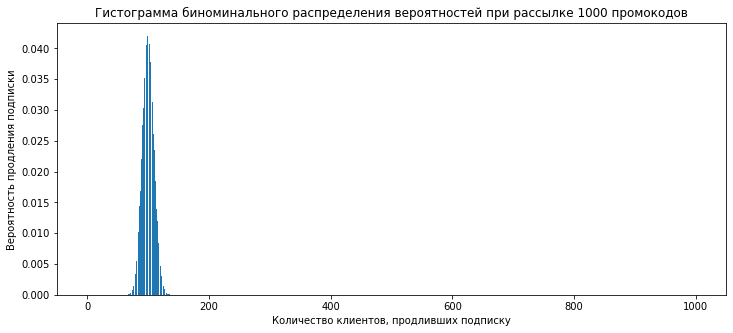

In [95]:
# Построим гистограмму распределения
from matplotlib import pyplot as plt
from scipy.stats import binom

n = 1000 # количество попыток
p = 0.1 # вероятность успеха

distr = [] # создаем список distr, в котором будете хранить значения распределения

for k in range(0, n + 1):
    current_value = binom.pmf(k, n, p)
    distr.append(current_value)

plt.figure(figsize=(12, 5))    
plt.bar(range(0, n + 1), distr)
plt.title(f'Гистограмма биноминального распределения вероятностей при рассылке {n} промокодов')
plt.xlabel('Количество клиентов, продливших подписку');
plt.ylabel("Вероятность продления подписки");
plt.show()

При рассылке 1000 промокодов, вероятность получить меньше 100 подписок очень велика,на гистограмме видно, что в диапазоне от 70 до 100 успехов примерно половина всего распределения. Риск неприемлемо велик. Будем увеличивать количество рассылок с шагом 100.

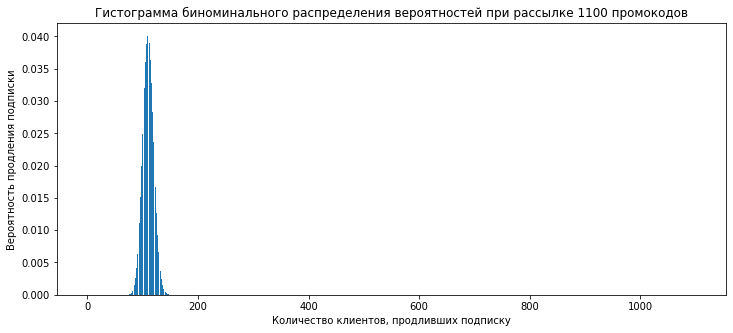

In [96]:
from matplotlib import pyplot as plt
from scipy.stats import binom

n = 1100 # количество попыток
p = 0.1 # вероятность успеха

distr = []

for k in range(0, n + 1):
    current_value = binom.pmf(k, n, p)
    distr.append(current_value)
    
plt.figure(figsize=(12, 5))    
plt.bar(range(0, n + 1), distr)
plt.title(f'Гистограмма биноминального распределения вероятностей при рассылке {n} промокодов')
plt.xlabel('Количество клиентов, продливших подписку');
plt.ylabel("Вероятность продления подписки");
plt.show()

Гистограмма сместилась вправо, но риск получить меньше 100 подписок все еще есть.

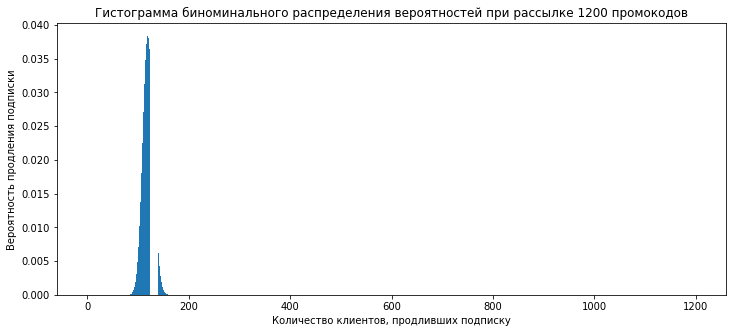

In [97]:
from matplotlib import pyplot as plt
from scipy.stats import binom

n = 1200 # количество попыток
p = 0.1 # вероятность успеха

distr = []

for k in range(0, n + 1):
    current_value = binom.pmf(k, n, p)
    distr.append(current_value)
    
plt.figure(figsize=(12, 5))    
plt.bar(range(0, n + 1), distr)
plt.title(f'Гистограмма биноминального распределения вероятностей при рассылке {n} промокодов')
plt.xlabel('Количество клиентов, продливших подписку');
plt.ylabel("Вероятность продления подписки");
plt.show()

Вот теперь вероятность уложиться в 5% похоже есть. Искомое значение количества промокодов лежит в диапазоне от 1100 до 1200. 

Воспользуемся методом cdf(), который получает на вход один аргумент и возвращает вероятность, что случайная величина примет значение, меньшее заданного аргумента, т.е. метод cdf() возвращает вероятность получить значение, равное 100 подписок или меньше. Чтобы получить нужную нам вероятность, вычтем результат cdf() из единицы.

In [98]:
# методом подгона найдем искомое значение, чтобы вероятность не выполнить план была примерно 5 %
from math import sqrt
from scipy import stats as st

# задаём параметры биномиального распределения
n = 1161 # данное значение подбираем вручную
p = 0.1

# задаём биномиальное распределение
distr = st.binom(n, p) 

# значение, для которого хотим найти вероятность
x = 99

# считаем вероятность получить значение больше x
result = 1 - distr.cdf(x)
print(result)


0.9502390990500975


Минимальное количество промокодов при котором вероятность не выполнить план будет примерно 5 %, равняется 1161. В данном случае 100 клиентов с вероятностью успеха 10% продлят подписку.

In [99]:
from scipy.stats import binom
import numpy as np

p = 0.1
n = 1000

# начать можно с 900
for n in range(1000, 1800):
    if binom.cdf(99, n, p) <= 0.05:
        print("Минимальное количество промокодов: ", n)
        break


Минимальное количество промокодов:  1161


#### 7.2 Отдел маркетинга рассылает клиентам push-уведомления в мобильном приложении. Клиенты могут открыть его или не открывать. Известно, что уведомления открывают около 40 % получивших клиентов. Отдел планирует разослать 1 млн уведомлений. С помощью аппроксимации построим примерный график распределения и оценим вероятность того, что уведомление откроют не более 399,5 тыс. пользователей.

In [100]:
# задаём параметры биномиального распределения
n = 1000000
p = 0.4
x = 399500

# зададим мат.ожидание и ст.отклонение нормального распределения равными
# мат.ожиданию и ст.отклонению биномиального распределения
mu = n * p
sigma = sqrt(n * p * (1 - p))

# задаём нормальное распределение
distr = st.norm(mu, sigma) 

# считаем вероятность хвоста слева от 399.5 тысяч
result = distr.cdf(x).round(4)

print(f'Вероятность того, что уведомление откроют не более 399,5 тыс. пользователей равняется {result}')

Вероятность того, что уведомление откроют не более 399,5 тыс. пользователей равняется 0.1537


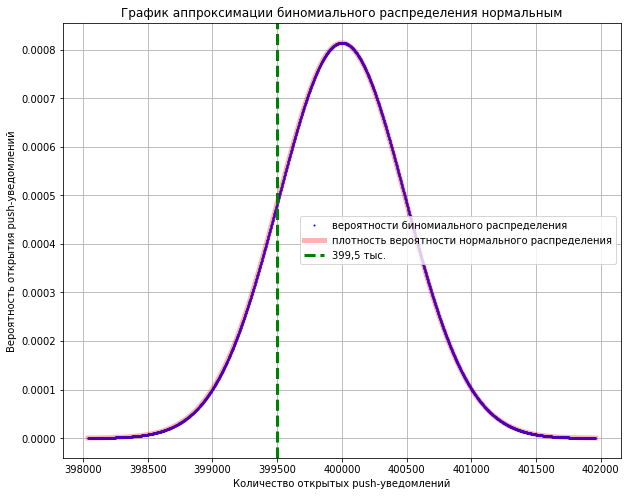

In [101]:
# Построим график
 
# зададим функцию, которая выдаёт <num> чисел,
# равномерно распределённых от <start> до <stop>
# (понадобится для визуализации нормального распределения)
def linspace(start, stop, num):
    step = (stop - start) / (num - 1)
    result = []
    for i in range(num):
        result.append(start + step * i)
    return result
 
# задаём параметры биномиального распределения
n = 1000000
p = 0.4
k = 399500

# границы промежутка, в котором будем строить аппроксимацию -
# от n*p минус 4 ст.отклонения бином.распределения
# до n*p плюс 4 ст.отклонения бином.распределения
# (там, где вероятности значений почти не равны нулю)
left = int(n * p - 4 * sqrt(n * p * (1 - p)))
right = int(n * p + 4 * sqrt(n * p * (1 - p)))

plt.figure(figsize=(10, 8)) 
# зададим набор значений биномиальной величины на выбранном промежутке:
# все неотрицательные целые числа от left до right
x = list(range(max(0, left), right))
# рисуем график биномиального распределения
ax = plt.subplot()
# используем синие о-образные маркеры и размер маркера 3
ax.plot(x, binom.pmf(x, n, p), 'bo', ms=1, label='вероятности биномиального распределения')

# зададим мат.ожидание и ст.отклонение нормального распределения равными
# мат.ожиданию и ст.отклонению биномиального распределения
mu = n * p
sigma = sqrt(n * p * (1 - p))
 
# рисуем график нормального распределения:
 
# получим список из 100 чисел от left до right
x = linspace(left, right, 100)
# используем красную линию ширины 5 и прозрачности 0.3
ax.plot(x, norm.pdf(x, mu, sigma), 'r-', lw=5, alpha=0.3, label='плотность вероятности нормального распределения')
 
# Добавляем вертикальную линию для отметки 399,5 тыс.
plt.axvline(k, color='green', linestyle='--', lw=3, label='399,5 тыс.')

# настраиваем оптимальное расположение легенды и выводим график 
plt.title('График аппроксимации биномиального распределения нормальным')
plt.xlabel('Количество открытых push-уведомлений')
plt.ylabel('Вероятность открытия push-уведомлений')
ax.legend(loc='best')
plt.grid(True)
plt.show()

Вероятность того, что push-уведомления откроют не более 399,5 тыс. пользователей равняется 15.37%. График аппроксимация биномиального распределения нормальным построен.

#### 7.3 Промежуточные выводы.

* Минимальное количество промокодов при котором вероятность не выполнить план будет примерно 5 %, равняется 1172. В данном случае 100 клиентов с вероятностью успеха 10% продлят подписку.
* Вероятность того, что push-уведомления откроют не более 399,5 тыс. пользователей равняется 15.37%;
* График аппроксимация биномиального распределения нормальным построен.

## Шаг 8. Общие выводы

#### Общий вывод: 

* Пользователи с подпиской выгоднее для компании: 
    * они тратят в сервисе больше времени на поездки, помесячная выручка от пользователей с подпиской по месяцам выше.
    * пользователи с подпиской за одну поездку проезжают оптимальное расстояния в 3130 метров. С учетом уровня статистической значимости alpha = 0.05, у нас нет оснований (нет достаточных данных) отвергать нулевую гипотезу о том, что среднее расстояние, пройденное пользователями с подпиской за одну поездку, равно 3130 метров. Медианная же дистанция одной поездки пользователей с подпиской состаляет 3149 метров. Это на 19 метров больше оптимального расстояния одной поездки.
* Доля пользователей с подпиской ultra составляет 45.6% и необходимы мероприятия для их привлечения для увеличения выручки компании.
* У пользователей без подписки free есть проблемы с использованием самокатов: наблюдаются аномальные значения расстояний от 4030 до 7211 метров при времени использования самоката 0.5 минут:
    * возможно есть необходимость либо доработать приложение, либо инструкцию пользования самокатом, т.к. пользователи по итогу не совершили поездку и соответственно, остались не довольны сервисом. 
    * И однозначно необходимо разобраться с работой сервиса, почему за такой маленький отрезок времени получились такие большие расстояния поездки.

Теперь подробнее по каждому шагу:

##### Шаг 1:

    * В полученных датафреймах наименование столбцов соответствует правилу красивого кода;
    * В датафрейме rides выявил не соответствие по столбцу date типа данных с содержимым.

##### Шаг 2:

    * данные в датасете rides представлены за один год;
    * привел столбец date таблицы rides к типу даты datetime;
    * создал в таблице rides новый столбец с номером месяца на основе столбца date;
    * проверил наличие пропущенных значений и на явные и неявные дубликаты:
        * пропусков в данных нет;
        * в таблице users были явные дубликаты в столбце user_id. После проверки, удалил их;
        * в таблицах rides и subscriptions явных дубликатов нет;
        * проверил таблицу users на неявные дубликаты. Неявных дубликатов нет;
        * в таблице subscriptions содержатся данные о тарифе. Необходимости в их проверки на неявные дубликаты нет.
    * проверил данные таблицы rides на аномалии:
        * по столбцу расстояний поездок distance таблицы rides аномальных значений нет;
        * по столбцу длительности поездок duration таблицы rides нашел 95 аномальных значений с продолжительностью поездки 0.5 мин и расстоянием за это время в дипазоне от 4030 до 7211 метров, что не реально;
        * аномальные данные с дистаницей поездки можно было бы удалить, т.к. они составляют всего 0.5% от всего объема данных, но в них содержатся данные для расчета выручки компании, ведь пользователи в любом случае оплатили 1 минуту и возможно старт поездки, если они без подписки. В рамках данного анализа оставим их как есть.

##### Шаг 3:

    * Чаще всего встречаются пользователи из города Пятигорск 14.3% (219 пользователей). 2 место - Екатеринбург 13.3% (204 пользователей). 3 место - Ростов-на-Дону 12.9% (198 пользователей). Обращает на себя внимание, что пользователей из Москвы меньше всех, - всего 11%, скорее всего это связано с высокой конкуренцией в данном городе;
    * Доля пользователей с подпиской ultra составляет 45.6%.
    * Самыми активными являются пользователи в возрастной группе от 20 до 30 лет, а именно:
        * 1 место пользователи - 25 лет (9.45%, 145 пользователей);
        * 2 место пользователи - 24 лет (8.60%, 132 пользователей);
        * 3 место пользователи - 26 лет (8.54%, 131 пользователей).
    * Также хотелось бы отметить, что самокат арендуют пользователи с возрастом от 12 до 18 (не включительно) лет, что является нарушением законодательства. Арендовать электросамокат могут только те, кто достиг 18 лет, т.к. ответственность за действия несовершеннолетних лежит на родителях или опекунах.
    * Чаще всего пользователи проезжают за одну поездку от 2800 до 3300 метров, самый пик 3000 метров (это самый выскоий 1-ый пик). Второй пик - это расстояние около 650 метров. Чем дальше от этих пиков, тем количество поездок становится меньше. Интересное наблюдение, что между 2-мя пиками при расстоянии около 1500 метров, количество поездок максимально снижается. Можно сделать вывод, что пользователи берут самокаты либо для коротких перемещений по необходимости (например, от дома до остановки), либо для долгих прогулок.
    * Чаще всего пользователи ездят на самокатах от 15 до 21 минуты. Есть тот самый аномальный пик около нуля с временем поездки 0.5 минут, возможно часть пользователей не разобрались как пользоваться либо самокатом, либо приложением и отменили поездку. А вот с замером расстояния поездки стоит проанализирвоать работу приложения.

##### Шаг 4:

    * Объединил данные о пользователях, поездках и подписках в один датафрейм методом merge(). Проверил объединенный датасет на пропуски, - пропусков нет;
    * Создал ещё два датафрейма c данными о пользователях без подписки free и с данными о пользователях с подпиской ultra;
    * Пользователи с подпиской ultra:
        * Пользователи с подпиской ultra ездят с четким пониманием своих потребностей в самокате и как раз гистограммы длительности и расстояния потребностей посторились достаточно узкие;
        * Наблюдаем 2 пика на гистограмме расстояний одной поездки. Чаще всего пользователи проезжают за одну поездку от 2900 до 3200 метров, самый пик 3100 метров (это самый высокий 1-ый пик). Второй пик - это расстояние около 1000 метров. Чем дальше от этих пиков, тем количество поездок становится меньше. Такое же интересное наблюдение, что между 2-мя пиками при расстоянии 2000 метров, количество поездок максимадльно снижается;
        * Чаще всего пользователи с подпиской ultra ездят на самокатах от 15 до 21 минуты.
    * Пользователи без подписки free:
        * Пользователи без подписки free ездят в более широком диапазоне расстояний и времени поездки. И наблюдаются пики около нуля, возможно есть необходимость либо доработать приложение, либо инструкцию пользования самокатом, т.к. пользователи по итогу не совершили поездку;
        * Наблюдаем также 2 пика на гистограмме расстояний одной поездки. Чаще всего пользователи без подписки free проезжают за одну поездку от 2200 до 3800 метров, это самый высокий 1-ый пик, но он очень широкий по разбросу расстояний. Второй пик также досточно широкий и начинается с нуля, возможно, часть пользователей не разобрались как пользоваться либо самокатом, либо приложением и отменили поездку. Такое же интересное наблюдение, что между 2-мя пиками при расстоянии около 1500 метров, количество поездок максимадльно снижается.
        * Чаще всего пользователи ездят на самокатах от 13 до 21 минуты. Есть интересный пик около нуля, возможно часть пользователей не разобрались как пользоваться либо самокатом, либо приложением и отменили поездку.

##### Шаг 5:

    * Создал датафрейм data_grouped с суммарным расстоянием, количеством поездок и суммарным временем для каждого пользователя за каждый месяц.
    * В датафрейм data_grouped добавил столбец с помесячной выручкой, которую принёс каждый пользователь в зависимости от типа подписки.

##### Шаг 6:

    * пользователи с подпиской тратят в сервисе больше времени на поездки и соответственно пользователи с подпиской «выгоднее» для компании /полученное значение p-value (~1.280409e-34) меньше заданного уровня значимости 0.05/;
    * пользователи с подпиской за одну поездку проезжают оптимальное расстояния в 3130 метров. С учетом уровня статистической значимости alpha = 0.05, у нас нет оснований (нет достаточных данных) отвергать нулевую гипотезу о том, что среднее расстояние, пройденное пользователями с подпиской за одну поездку, равно 3130 метров. Медианная дистанция одной поездки пользователей с подпиской состаляет 3149 метров. Это на 19 метров больше оптимального расстояния одной поездки.
    * помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки /полученное значение p-value (2.8130926188487286e-35) меньше заданного уровня значимости 0.05/;
    * Чтобы проверить гипотезу что количество обращений в техподдержку значимо снизилось после того, как техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение, я бы применил метод scipy.stats.ttest_rel().

##### Шаг 7:

    * Минимальное количество промокодов при котором вероятность не выполнить план будет примерно 5 %, равняется 1161. В данном случае 100 клиентов с вероятностью успеха 10% продлят подписку;
    * Вероятность того, что push-уведомления откроют не более 399,5 тыс. пользователей равняется 15.37%;
    * График аппроксимация биномиального распределения нормальным построен.